# Logistic Regression Model

Here, we will use a logistic regression model to classify whether or not someone has had severe psychological distress in the past month.

First, let's import some modules that we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
filename = 'drugAbuse_data_cleaned.csv'
df = pd.read_csv(filename)

# Getting Data Ready for Analysis

First, we will perform the analysis by dropping many of the features that likely have strong correlation with others.

In [3]:
df.drop(columns=['# Days Used Alcohol Past Year','# Days Used Cocaine Past Month','Major Depressive Episode in Past Year',
                '# Days Used Alcohol Past Month','# Days Used Cocaine Past Year','# Days Used Marijuana Past Year',
                'Cocaine Recency','First Used LSD Prior to 21','Severe Psychological Distress Past Year',
                '# Days Used Hallucinogens Past Month','First Used Hallucinogens Prior to 21','Marijuana Recency',
                'Psychological Distress Score Past Month','Age','# Days Used Hallucinogens Past Year',
                'Moderate Mental Illness in Past Year','LSD Recency','First Used Alcohol Prior to 21',
                'First Used Marijuana Prior to 21','First Used Cocaine Prior to 21','Serious Mental Illness in Past Year',
                'Mild Mental Illness in Past Year','Psychological Distress Score in Worst Month of Past Year',
                'Alcohol Recency','# Days Binge Drank Past Month','Unnamed: 0'],inplace=True)

In [4]:
df.shape

(14553, 23)

Now, we have 23 features to work with.

In [5]:
df

,# Days Used Marijuana Past Year (Range),Cocaine Abuse in Past Year,Severe Psychological Distress Past Month,First Used Marijuana Prior to 18,Hallucinogen Dependence in Past Year,# Days Used Cocaine Past Year (Range),# Days Used Marijuana Past Month (Range),First Used Hallucinogens Prior to 18,Hallucinogen Abuse in Past Year,Alcohol Dependence in Past Year,...,Cocaine Dependence in Past Year,# Days Used Cocaine Past Month (Range),Alcohol Abuse in Past Year,# Days Used Hallucinogens Past Month (Range),# Days Used Hallucinogens Past Year (Range),Marijuana Abuse in Past Year,First Used Alcohol Prior to 18,# Days Used Alcohol Past Year (Range),Marijuana Dependence in Past Year,# Days Used Alcohol Past Month (Range)
0,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,No,1-11,No,0
1,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,Yes,100-299,No,6-19
2,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,No,50-99,No,3-5
3,0,No,No,Yes,No,0,0,No,No,No,...,No,0,No,0,0,No,No,12-49,No,0
4,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,Yes,0,No,0
5,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,No,0,No,0
6,0,No,No,Yes,No,0,0,No,No,No,...,No,0,No,0,0,No,Yes,12-49,No,3-5
7,0,No,No,No,No,0,0,No,No,No,...,No,0,No,0,0,No,No,0,No,0
8,12-49,No,No,No,No,0,20-30,No,No,No,...,No,0,No,0,0,No,Yes,12-49,No,0
9,50-99,No,No,Yes,No,0,1-2,No,No,No,...,No,0,Yes,0,1-11,No,Yes,50-99,No,6-19


In [6]:
df.columns

Index([u'# Days Used Marijuana Past Year (Range)',
       u'Cocaine Abuse in Past Year',
       u'Severe Psychological Distress Past Month',
       u'First Used Marijuana Prior to 18',
       u'Hallucinogen Dependence in Past Year',
       u'# Days Used Cocaine Past Year (Range)',
       u'# Days Used Marijuana Past Month (Range)',
       u'First Used Hallucinogens Prior to 18',
       u'Hallucinogen Abuse in Past Year', u'Alcohol Dependence in Past Year',
       u'# Days Used Marijuana Past Month', u'First Used Cocaine Prior to 18',
       u'First Used LSD Prior to 18', u'Cocaine Dependence in Past Year',
       u'# Days Used Cocaine Past Month (Range)',
       u'Alcohol Abuse in Past Year',
       u'# Days Used Hallucinogens Past Month (Range)',
       u'# Days Used Hallucinogens Past Year (Range)',
       u'Marijuana Abuse in Past Year', u'First Used Alcohol Prior to 18',
       u'# Days Used Alcohol Past Year (Range)',
       u'Marijuana Dependence in Past Year',
       u'# Days Us

Let's use scikit-learn's LabelEncoder to encode binary categorical variables, and use the .replace function to replace the categorical variables involving the range.

In [7]:
binary_catvars = ['Cocaine Abuse in Past Year','Severe Psychological Distress Past Month','First Used Marijuana Prior to 18',
                 'Hallucinogen Dependence in Past Year','First Used Hallucinogens Prior to 18','Hallucinogen Abuse in Past Year',
                 'Alcohol Dependence in Past Year','First Used Cocaine Prior to 18','First Used LSD Prior to 18',
                 'Cocaine Dependence in Past Year','Alcohol Abuse in Past Year','Marijuana Abuse in Past Year',
                 'First Used Alcohol Prior to 18','Marijuana Dependence in Past Year']

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
tmp = df[binary_catvars].apply(lbl_enc.fit_transform)

In [9]:
# Label binary categorical variables with 0 and 1 (corresponding to 'Yes' and 'No')
df.drop(binary_catvars, axis=1, inplace=True)
df = pd.concat([df, tmp], axis=1)

In [10]:
# replace the range variables with appropriate values for the past year
replaced = {'0':0,'1-11':1,'12-49':2,'50-99':3,'100-299':4,'300-365':5}
df.replace({'# Days Used Alcohol Past Year (Range)':replaced,'# Days Used Marijuana Past Year (Range)':replaced,
                        '# Days Used Cocaine Past Year (Range)':replaced,'# Days Used Hallucinogens Past Year (Range)':replaced},
                       inplace=True)

In [11]:
# replace the range variables with appropriate values for the past month
replaced = {'0':0,'1-2':1,'3-5':2,'6-19':3,'20-30':4}
df.replace({'# Days Used Alcohol Past Month (Range)':replaced,'# Days Used Marijuana Past Month (Range)':replaced,
                        '# Days Used Cocaine Past Month (Range)':replaced,'# Days Used Hallucinogens Past Month (Range)':replaced},
                       inplace=True)

We have successfully cleaned our data and dealt with categorical variables. Now we can start our analysis. Let's begin by splitting our data into X and y, and then subsequently into our training sets and test sets.

In [12]:
# create our X and y
X = df.drop(columns=['Severe Psychological Distress Past Month']).values
y = df['Severe Psychological Distress Past Month'].values

from sklearn.model_selection import train_test_split
# we are using 30% of the data as a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

We will be using standard Logistic Regression. We will do some hyperparameter tuning using GridSearchCV to tune our regularization parameter (C) and whether or not we should use l1 or l2 regularization.

In [13]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,
             'penalty':['l1','l2']}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5,scoring='roc_auc')

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 0.4393970560760795}
Best score is 0.642854263807


Keep in mind that we are using the AUC score as the scoring metric and not the accuracy because a large percentage of the individuals do not have severe psychological distress, and so the even if we classified no one as having severe psychological distress, we would still be very accurate.

Now that we have tuned our hyperparameters, we can test the accuracy on the test set, as well as compute other metrics such as the classification report,confusion matrix, and AUC score.

Accuracy Score: 0.891204764086
Classification Report: 
              precision    recall  f1-score   support

          0       0.89      1.00      0.94      3887
          1       0.61      0.02      0.04       479

avg / total       0.86      0.89      0.84      4366

Confusion Matrix: 
 [[3880    7]
 [ 468   11]]
AUC Score: 0.62278469047


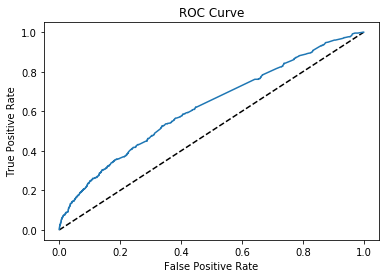

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# predict the data
y_pred = logreg_cv.predict(X_test)
# accuracy on the test set
print("Accuracy Score: {}".format(accuracy_score(y_pred,y_test)))

# classification report on the test set
print("Classification Report: \n {}".format(classification_report(y_test,y_pred)))

# confusion matrix on the test set
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

# AUC score on the test set
print("AUC Score: {}".format(roc_auc_score(y_test,logreg_cv.predict_proba(X_test)[:,1])))

# let's plot the ROC curve as well
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Obviously, our model performed very poorly. We were very successful with predicting all people that did not have psychological distress, but we had a lot of false negatives in predicting people with severe psychological distress in the past month. Let's see if including the features from before changes our results in any way. Let's re-import the data.

# Performing Analysis with all the features

In [15]:
filename = 'drugAbuse_data_cleaned.csv'
df = pd.read_csv(filename)

Of course, we do need to remove certain dependent variables.

In [16]:
df.columns

Index([u'Unnamed: 0', u'# Days Used Alcohol Past Year',
       u'# Days Used Cocaine Past Month',
       u'Major Depressive Episode in Past Year',
       u'# Days Used Marijuana Past Year (Range)',
       u'Cocaine Abuse in Past Year', u'# Days Used Alcohol Past Month',
       u'# Days Used Cocaine Past Year',
       u'Severe Psychological Distress Past Month',
       u'# Days Used Marijuana Past Year', u'First Used Marijuana Prior to 18',
       u'Hallucinogen Dependence in Past Year',
       u'# Days Used Cocaine Past Year (Range)',
       u'# Days Used Marijuana Past Month (Range)', u'Cocaine Recency',
       u'First Used LSD Prior to 21',
       u'Severe Psychological Distress Past Year',
       u'First Used Hallucinogens Prior to 18',
       u'# Days Used Hallucinogens Past Month',
       u'First Used Hallucinogens Prior to 21',
       u'Hallucinogen Abuse in Past Year', u'Alcohol Dependence in Past Year',
       u'Marijuana Recency', u'Psychological Distress Score Past Month',
  

In [17]:
df.drop(columns=['Unnamed: 0','Major Depressive Episode in Past Year','Severe Psychological Distress Past Year',
                'Moderate Mental Illness in Past Year','Serious Mental Illness in Past Year',
                'Mild Mental Illness in Past Year','Psychological Distress Score in Worst Month of Past Year','Age',
                'Psychological Distress Score Past Month'],
       inplace=True)

In [18]:
binary_catvars = ['Cocaine Abuse in Past Year','Severe Psychological Distress Past Month','First Used Marijuana Prior to 18',
                 'Hallucinogen Dependence in Past Year','First Used Hallucinogens Prior to 18','Hallucinogen Abuse in Past Year',
                 'Alcohol Dependence in Past Year','First Used Cocaine Prior to 18','First Used LSD Prior to 18',
                 'Cocaine Dependence in Past Year','Alcohol Abuse in Past Year','Marijuana Abuse in Past Year',
                 'First Used Alcohol Prior to 18','Marijuana Dependence in Past Year','First Used LSD Prior to 21',
                 'First Used Alcohol Prior to 21','First Used Marijuana Prior to 21','First Used Cocaine Prior to 21',
                 'First Used Hallucinogens Prior to 21']
lbl_enc = LabelEncoder()
tmp = df[binary_catvars].apply(lbl_enc.fit_transform)
# Label binary categorical variables with 0 and 1 (corresponding to 'Yes' and 'No')
df.drop(binary_catvars, axis=1, inplace=True)
df = pd.concat([df, tmp], axis=1)

In [19]:
# replace the string values with numerical values for past year (range)
replaced = {'0':0,'1-11':1,'12-49':2,'50-99':3,'100-299':4,'300-365':5}
df.replace({'# Days Used Alcohol Past Year (Range)':replaced,'# Days Used Marijuana Past Year (Range)':replaced,
                        '# Days Used Cocaine Past Year (Range)':replaced,'# Days Used Hallucinogens Past Year (Range)':replaced},
                       inplace=True)

In [20]:
# replace the string values with numerical values for past month (range)
replaced = {'0':0,'1-2':1,'3-5':2,'6-19':3,'20-30':4}
df.replace({'# Days Used Alcohol Past Month (Range)':replaced,'# Days Used Marijuana Past Month (Range)':replaced,
                        '# Days Used Cocaine Past Month (Range)':replaced,'# Days Used Hallucinogens Past Month (Range)':replaced},
                       inplace=True)

In [21]:
# replace the string values with numerical values for past 'recency'
replaced = {'Never Used':0,'More than a Year Ago':1,'Between 30 Days and a Year Ago':2,'Within Past 30 Days':3}
df.replace({'Alcohol Recency':replaced,'Marijuana Recency':replaced,'Cocaine Recency':replaced,
                         'LSD Recency':replaced},inplace=True)

Now, we will set up a pipeline to scale our data (because the variables involving # of days used have largely different scales than the rest of the data). Let's print out the best parameters, and test our model as we did before. However, this time we will impose that we need to use L2 regularization.

Tuned Logistic Regression Parameters: {'logistic__C': 0.0007196856730011522}
Best score is 0.637990463587
Accuracy Score: 0.8928080623
Classification Report: 
              precision    recall  f1-score   support

          0       0.90      0.99      0.94      3908
          1       0.33      0.02      0.04       458

avg / total       0.84      0.89      0.85      4366

Confusion Matrix: 
 [[3888   20]
 [ 448   10]]
AUC Score: 0.650890235236


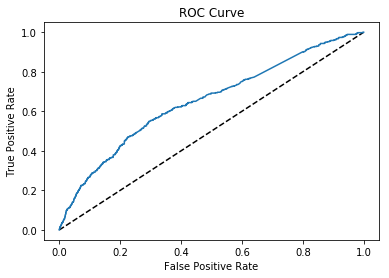

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create our X and y
X = df.drop(columns=['Severe Psychological Distress Past Month']).values
y = df['Severe Psychological Distress Past Month'].values

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('logistic', LogisticRegression(penalty='l2'))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
parameters = {'logistic__C': c_space}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters,cv=5,scoring='roc_auc')

# Fit to the training set
cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(cv.best_params_)) 
print("Best score is {}".format(cv.best_score_))

# predict the data
y_pred = cv.predict(X_test)
# accuracy on the test set
print("Accuracy Score: {}".format(accuracy_score(y_pred,y_test)))

# classification report on the test set
print("Classification Report: \n {}".format(classification_report(y_test,y_pred)))

# confusion matrix on the test set
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

# AUC score on the test set
print("AUC Score: {}".format(roc_auc_score(y_test,cv.predict_proba(X_test)[:,1])))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Our results are not much better when we include all the features. We would be better off using a different model.

Let's export this csv file so we can use this cleaned/model-ready data for other models.

In [23]:
df.to_csv('drugAbuse_data_cleaned_model_ready.csv',sep=',')